# Linear Regression Using Python

## 1. Theory

Suppose that you want to fit a set data points $(x_i,y_i)$, where
$i = 1,2,\ldots,N$, to a straight line, $y=mx+b$.  The process of determining the best-fit line is called <i>linear regression</i>.  This involves choosing the parameters $m$ and $b$ to minimize the sum of the squares of the differences between the data points and the linear function.  How the difference are defined varies.  If there are only uncertainties in the <i>y</i> direction, then the differences in the vertical direction (the gray lines in the figure below) are used.  If there are uncertainties in both the $x$ and $y$ directions, the orthogonal (perpendicular) distances from the line (the dotted red lines in the figure below) are used.  
<center>
<img src="http://blog.rtwilson.com/wp-content/uploads/2015/11/Normal_vs_ODR.png" width=500>  
Image from http://blog.rtwilson.com/orthogonal-distance-regression-in-python/  
</center>  

For the case where there are only uncertainties in the <i>y</i> direction, there is an analytical solution to the problem.  If the uncertainty in $y_i$ is $\sigma_i$, then the difference squared for each point is weighted by $w_i=1/U_i^2$. If there are no uncertainties, each point is given an equal weight of one. The function to be minimized with respect to
variations in the parameters, $a$ and $b$, is  

$$
\chi^2 = \sum_{i=1}^N w_i \left[y_i - \left(mx_i+b\right)\right]^2.
$$  
The lab reference manual gives equations for the best values, but those don't take the uncertainties into account. The analytical solutions for the best-fit parameters that minimize $\chi^2$
(see pp. 181-189 of <i>An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements</i> by John R. Taylor, for example) are  

$$
m=\frac{\sum w_i \sum w_i x_i y_i - \sum w_i x_i \sum w_i y_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}
$$  
and
$$
b=\frac{\sum w_i y_i \sum w_i x_i^2 - \sum w_i x_i \sum w_i x_i y_i}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}.
$$  
The uncertainties in the parameters are  

$$
U_a=\sqrt{\frac{\sum w_i}{\sum w
_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}}
$$  
and
$$
U_b=\sqrt{\frac{\sum w_i x_i^2}{\sum w_i \sum w_i x_i^2 - \left(\sum w_i \sum w_i x_i\right)^2}}.
$$  
All of the sums in the four previous equations are over $i$ from 1 to $N$.  

For the case where there are uncertainties in both $x$ and $y$, there is no analytical solution. The complex method used is called <i>orthogonal distance regression</i> (ODR). 



## 2. Implementation in Python 

The **`linear_fit`** function that performs these calculations is defined in the file "fitting.py".  The file must be located in the same directory as the Python program using it. If there are no uncertainties or only uncertainties in the $y$ direction, the analytical expressions above are used. If there are uncertainties in both the $x$ and $y$ directions, the scipy.odr module is used.



### (a) Uncertainty in $y$ Direction

An example of performing a linear fit with uncertainties in the $y$ direction is shown below. The first command imports the function. Arrays containing the data points ($x$ and $y$) are sent to the function. If only one array of uncertainties (called $yerr$ in the example) is sent, they are assumed to be in the $y$ direction. In the example, the array
function (from the pylab library) is used to turn lists into arrays. It is also possible to read data from a file. The fitting function returns the best-fit parameters (called $a$ and $b$ in the example), their uncertainties (called $Ua$ and $Ub$ in the example), the reduced chi squared, and the degrees of freedom (called $rchi2$ and $dof$ in the example). The last two quantities are defined in the next section. 

results of linear_fit:
   reduced chi squared =  1.8529522376833425
   degrees of freedom =  3
y = mx + b
m =  0.5475554719819483  +/-  0.027442716158878274
b =  1.0352012034599476  +/-  0.09253847679669566


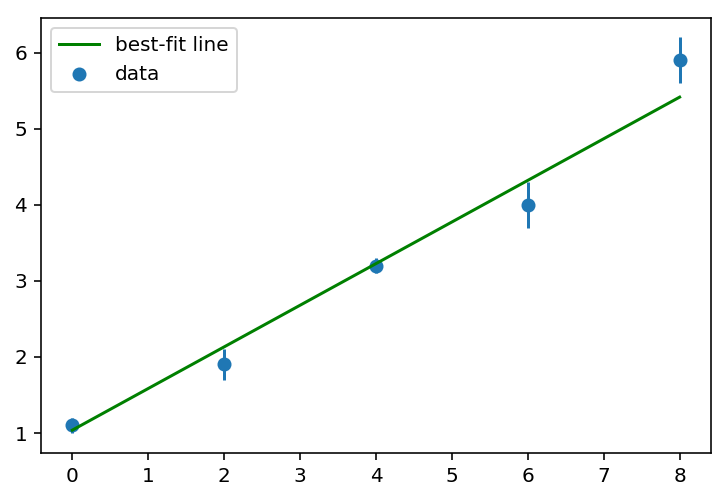

In [1]:
from fitting import linear_fit
from pylab import *

# Data and uncertainties (lists must be same lengths)
x = array([0.0, 2.0, 4.0, 6.0, 8.0])
y = array([1.1, 1.9, 3.2, 4.0, 5.9])
yerr = array([0.1, 0.2, 0.1, 0.3, 0.3])

# Perform the fit
m, b, Um, Ub, rchi2, dof = linear_fit(x, y, yerr)

# Print results of fit
print('y = mx + b')
print('m = ', m, ' +/- ', Um)
print('b = ', b, ' +/- ', Ub)

# Make points for best fit line and plot
xf = linspace(min(x),max(x),100)
yf = m*xf + b

figure()
scatter(x,y,label='data')  # plot data
errorbar(x, y, yerr, ls='None')  # add error bars to data
plot(xf,yf,"g-",label='best-fit line')  # plot best-fit line
legend(loc='upper left')  # add a legend
show()

### (b) Uncertainties in $x$ and $y$ Directions

An example of performing a linear fit with uncertainties in both the $x$ and $y$ direction is shown below. Arrays containing the data points ($x2$ and $y2$) and their uncertainties ($y2err$ and $x2err$) are sent to the function.  Note the order of the uncertainties!  The uncertainty in $x$ is optional, so it is second.  This is also consistent with the **`errorbar`** function (see below). Note that some of the error bars don't show up because they are very small.

results of linear_fit:
   reduced chi squared =  1.530628793165336
   degrees of freedom =  8
y = mx + b
m =  -0.4804893115580032  +/-  0.0714932577585351
b =  5.477489333585912  +/-  0.3650029294122116


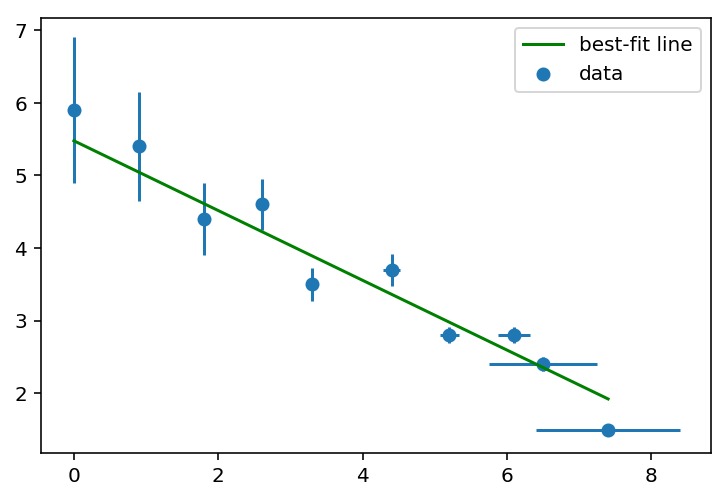

In [2]:
from fitting import linear_fit
from pylab import *

# Data and uncertainties (lists must be same lengths)
x = array([0.0, 0.9, 1.8, 2.6, 3.3, 4.4, 5.2, 6.1, 6.5, 7.4])
xerr = array([0.03162, 0.03162, 0.04472, 0.03536, 0.07071, 0.1118, 0.1291, 0.2236, 0.7454, 1.0])
y = array([5.9, 5.4, 4.4, 4.6, 3.5, 3.7, 2.8, 2.8, 2.4, 1.5])
yerr = array([1.0, 0.7454, 0.5, 0.3536, 0.2236, 0.2236, 0.1118, 0.1118, 0.1, 0.04472])

# Perform the fit
m, b, Um, Ub, rchi2, dof = linear_fit(x,y,yerr,xerr)

# Print results of fit
print('y = mx + b')
print('m = ', m, ' +/- ', Um)
print('b = ', b, ' +/- ', Ub)

# Make points for best fit line and plot
xf = linspace(min(x),max(x),100)
yf = m*xf + b

figure()
scatter(x,y,label='data')  # plot data
errorbar(x, y, yerr, xerr, ls='None')  # add error bars, note the order of the uncertainties in x and y
plot(xf,yf,"g-",label='best-fit line')  # plot best-fit line
legend(loc='upper right')  # add a legend
show()

## 3. Intrepeting the Results

Plotting data with error bars and a best-fit line together gives a rough idea of whether or not the fit is good. If the line passes within most of the error bars, the fit is probably reasonably good. (In advanced lab, you will also use the reduced chi square will also be used to judge the goodness of the fit.)

## Additional Documentation

More information is available at https://docs.scipy.org/doc/scipy/reference/odr.html